<a href="https://colab.research.google.com/github/DiegoLeonG96/Tarea2_MLA/blob/main/Tarea_2_MLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    <em>Curso: Machine Learning Avanzado </em><br>

</div>


# Tarea 2: Red Neuronal Convolucional
**Integrantes**:
- Kurt Castro
- Diego León
- Cristian Pizarro

## 1. Introducción

Las redes neuronales convulsionales se han consolidado como una herramienta de amplio uso en múltiples industrias gracias a su capacidad de procesar datos visuales, siendo utilizado ya sea para el desarrollo de vehículos autónomos, sistemas de reconocimiento facial, procedimientos de control de calidad (clasificando la producción según estado u otra característica), entre muchos otros.

En el presente trabajo utilizaremos la base de datos ‘Muffin vs Chihuahua’ disponibilizada en Kaggle por Shreyas Mocherla. Ésta contiene, como su nombre lo indica, imágenes de Muffins y Chihuahuas, las cuales son visualmente muy similares. El desafío que se propone es precisamente desarrollar un modelo de clasificación que logre sortear estas semejanzas o patrones que no son claramente distinguibles.  


## 2. Objetivo

El objetivo principal será generar un modelo de clasificación basado en redes neuronales convulsionales que logre clasificar correctamente las imágenes en Chihuahas o Muffins.

Los objetivos secundarios serán asegurar un correcto procesamiento y balance de los datos, así como también garantizar la mejor precisión, ajuste y desempeño general posible mientras controlamos su estabilidad.


## 3. Metodología

## 4.  Carga y Preprocesamiento de Datos

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random
import kagglehub
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from tensorflow.keras.regularizers import l2

# Establecemos semillas (Python, Numpy, Tensorflow)
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Verifica las GPUs disponibles
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Se encontró GPU: {gpus}")
else:
    print("No se encontró GPU. Asegúrate de haber activado el entorno con GPU en Colab.")

Se encontró GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

100%|██████████| 474M/474M [00:06<00:00, 75.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2


In [ ]:
base_path = "/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2"

In [ ]:
# train y test
train_dir = f'{base_path}/train'
test_dir = f'{base_path}/test'

batch_size = 32
num_classes = 2


# generators
image_size = (150, 150)
input_shape = (150, 150, 3)

# Cargar datos directamente
X_train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size
)

X_test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size
)

# Convertir a tensores numpy si es necesario
X_train, y_train = [], []
for images, labels in X_train_ds:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

X_test, y_test = [], []
for images, labels in X_test_ds:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

# Combinar los datos en arreglos numpy
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train).ravel()
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test).ravel()

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.
X_train shape: (4733, 150, 150, 3), y_train shape: (4733,)
X_test shape: (1184, 150, 150, 3), y_test shape: (1184,)


## 5. Aplicación de Modelos

## MLP (Multilayer Perceptron)

In [ ]:
# Dimensiones originales de las imágenes
num_samples, height, width, channels = X_train.shape

# Aplanamos las imágenes
X_train_flattened = X_train.reshape(num_samples, height * width * channels)

# Aplanamos el conjunto de pruebas
X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5488 - loss: 22364.4199 - val_accuracy: 0.7117 - val_loss: 415.2614
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6475 - loss: 761.9553 - val_accuracy: 0.6494 - val_loss: 533.8163
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6305 - loss: 655.3630 - val_accuracy: 0.6832 - val_loss: 53.0878
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7411 - loss: 25.1058 - val_accuracy: 0.7302 - val_loss: 5.1957
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7672 - loss: 1.9130 - val_accuracy: 0.7302 - val_loss: 0.7651
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7978 - loss: 0.5252 - val_accuracy: 0.7376 - val_loss: 0.6895
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8044 - loss: 0.4839 - val_accuracy: 0.7350 - val_loss: 0.7105
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8104 - loss: 0.4798 - va

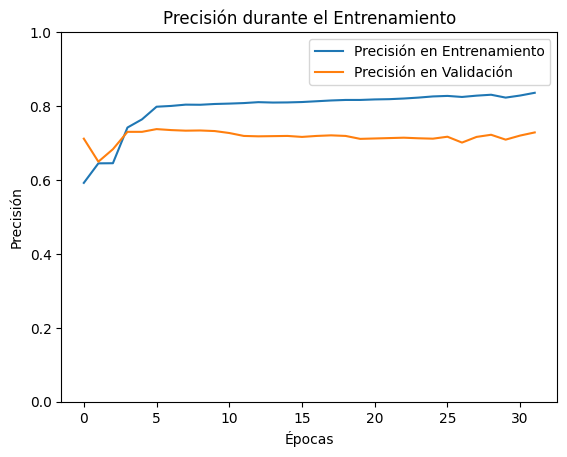

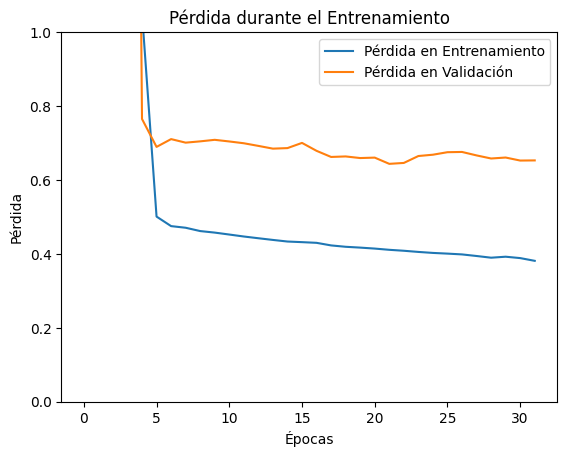

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
AUC del modelo: 0.8018


In [ ]:
# Definimos la estructura
hidden_units = 128
batch_size = 32
lr = 1e-2
model_mlp = Sequential([
    Dense(hidden_units, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1))
])

# Compilamos
model_mlp.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

#Entrenamos
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_mlp.fit(X_train_flattened, y_train,
                    epochs=100,
                    batch_size=batch_size,
                    validation_split=0.4,
                    callbacks=[early_stopping])

# Evaluamos el modelo
train_acc=model_mlp.evaluate(X_train_flattened, y_train, batch_size=batch_size)[1]
test_acc=model_mlp.evaluate(X_test_flattened, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_mlp.predict(X_test_flattened)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

## Red Neuronal Convolucional 1

In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-2),
             metrics=['accuracy'])

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.7712 - loss: 0.6043 - val_accuracy: 0.6782 - val_loss: 1.3590
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8681 - loss: 0.3213 - val_accuracy: 0.7703 - val_loss: 0.5410
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8987 - loss: 0.2696 - val_accuracy: 0.6351 - val_loss: 1.7850
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9056 - loss: 0.2280 - val_accuracy: 0.7846 - val_loss: 0.5475
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9233 - loss: 0.1941 - val_accuracy: 0.8725 - val_loss: 0.4342
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9427 - loss: 0.1562 - val_accuracy: 0.8193 - val_loss: 0.6053
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9471 - loss: 0.1423 - val_accuracy: 0.8742 - val_loss: 0.6746
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9543 - loss: 0.1329 -

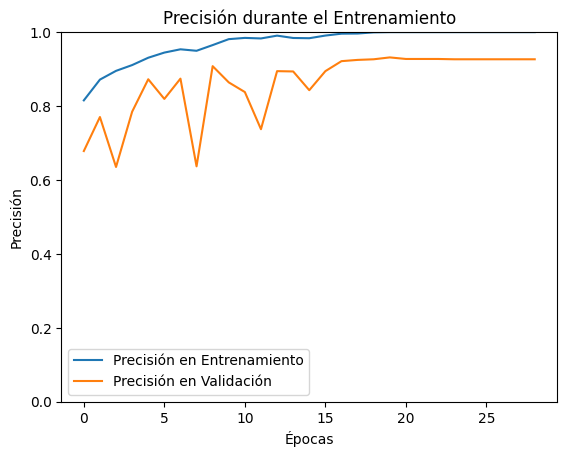

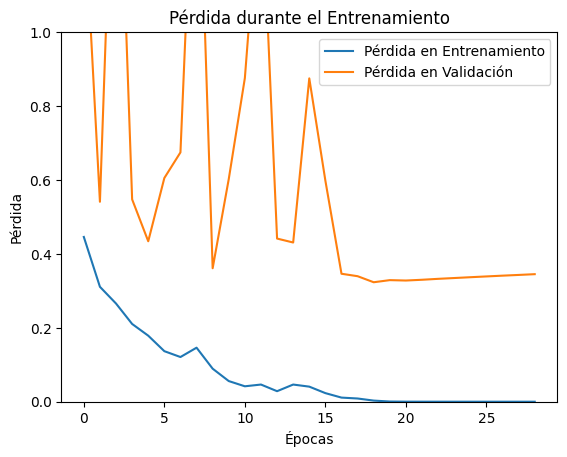

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
AUC del modelo: 0.9805


In [ ]:
batch_size = 32
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

## Red Neuronal Convolucional 2.

Objetivo: Control de Sobreajuste.

Medida: Se añade Dropout.

In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-2),
             metrics=['accuracy'])

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7376 - loss: 0.6258 - val_accuracy: 0.6208 - val_loss: 1.5969
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.8600 - loss: 0.3473 - val_accuracy: 0.5515 - val_loss: 2.2010
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8849 - loss: 0.3003 - val_accuracy: 0.5574 - val_loss: 1.6196
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8893 - loss: 0.2778 - val_accuracy: 0.5397 - val_loss: 2.6285
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8815 - loss: 0.2993 - val_accuracy: 0.7238 - val_loss: 0.9315
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9074 - loss: 0.2346 - val_accuracy: 0.6250 - val_loss: 1.0918
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9194 - loss: 0.2100 - val_accuracy: 0.9046 - val_loss: 0.2688
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9228 - loss: 0.1967 

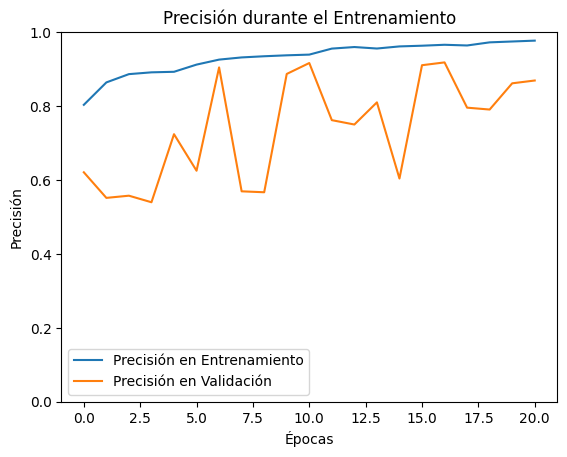

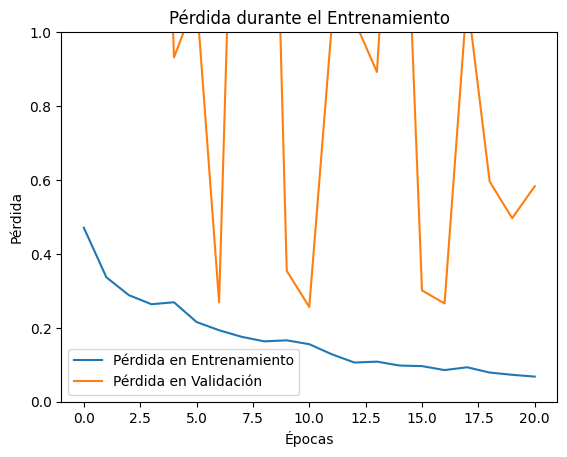

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9743


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
batch_size = 32
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

## Red Neuronal Convolucional 3.

Objetivo: Control de ruido / Mejorar estabilidad.

Primero se modifica el learning rate (a uno aún más bajo).

Posteriormente se modifica el batch size (a uno más alto).

Ambas modificaciones deberían ayudarnos a reducir el ruido observado en la precisión y pérdida de los datos de validación.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 4s/step - accuracy: 0.6175 - loss: 0.8554 - val_accuracy: 0.5912 - val_loss: 0.9862
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/step - accuracy: 0.7726 - loss: 0.5735 - val_accuracy: 0.5963 - val_loss: 0.8593
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 456ms/step - accuracy: 0.8031 - loss: 0.4689 - val_accuracy: 0.6892 - val_loss: 0.6317
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step - accuracy: 0.8174 - loss: 0.4464 - val_accuracy: 0.7196 - val_loss: 0.6186
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 441ms/step - accuracy: 0.8318 - loss: 0.4332 - val_accuracy: 0.7399 - val_loss: 0.5662
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 423ms/step - accuracy: 0.8449 - loss: 0.3883 - val_accuracy: 0.7432 - val_loss: 0.5526
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 432ms/step - accuracy: 0.8562 - loss: 0.3745 - val_accuracy: 0.7525 - val_loss: 0.5195
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step - accuracy: 0.8598 - loss: 0.3572 - val_accura

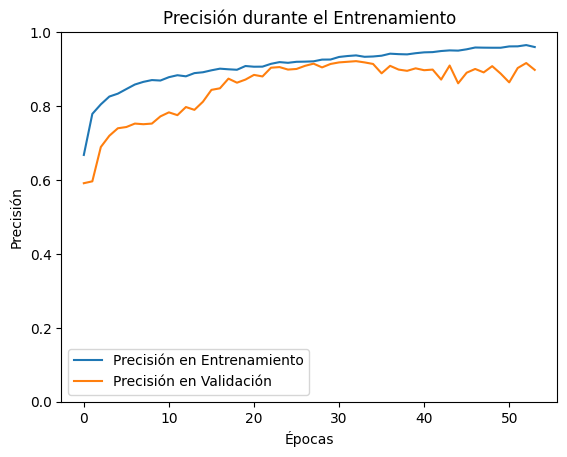

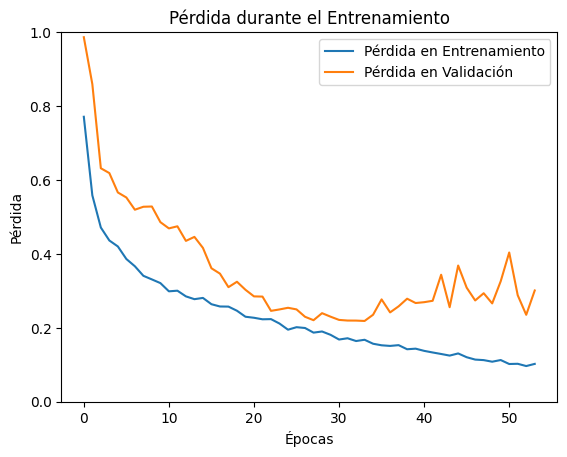

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9703


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])

model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4), #Se ajusta learning rate
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) # Se aumenta la paciencia en función de las modificaciones.
batch_size = 512 # Se incrementa el batch size
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

## Red Neuronal Convolucional 4.

Objetivo: Intentar controlar un poco más el ligero sobreajuste observado.

Medida: Simplificar el modelo (Se reducen el N° de capas).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.6343 - loss: 0.8441 - val_accuracy: 0.7111 - val_loss: 1.1843
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 409ms/step - accuracy: 0.8019 - loss: 0.5147 - val_accuracy: 0.7745 - val_loss: 0.6613
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - accuracy: 0.8375 - loss: 0.4179 - val_accuracy: 0.7365 - val_loss: 0.7239
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 406ms/step - accuracy: 0.8457 - loss: 0.3939 - val_accuracy: 0.7635 - val_loss: 0.5773
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.8621 - loss: 0.3464 - val_accuracy: 0.7230 - val_loss: 0.6759
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 379ms/step - accuracy: 0.8731 - loss: 0.3180 - val_accuracy: 0.7981 - val_loss: 0.4530
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step - accuracy: 0.8899 - loss: 0.2952 - val_accuracy: 0.8057 - val_loss: 0.4396
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 0.8912 - loss: 0.2777 - val_accur

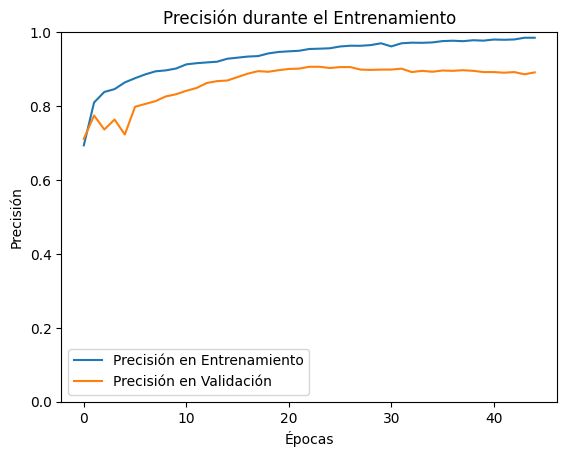

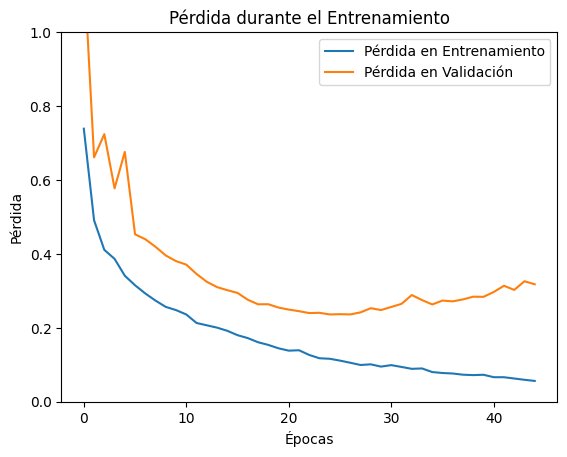

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
AUC del modelo: 0.9650


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4))
])

model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4),
             metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
batch_size = 512
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

Conclusión: Disminuir las capas NO aportaron en la corrección del sobreajuste. No se considerará para los siguientes modelos.

## Red Neuronal Convolucional 5.
Se intenta seguir mejorando el sobreajuste.

Medida: Se añade regularización L2, con un valor muy bajo (0.0001) dado que el sobreajuste es muy ligero, y tampoco queremos empeorar los valores de pérdida (se ha observado que valores muy altos de regularización L2 aumenta considerablemente la pérdida en entrenamiento y validación).

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6209 - loss: 0.9196 - val_accuracy: 0.5709 - val_loss: 1.3876
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 420ms/step - accuracy: 0.7614 - loss: 0.6277 - val_accuracy: 0.5828 - val_loss: 1.0886
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.7982 - loss: 0.5874 - val_accuracy: 0.7238 - val_loss: 0.6275
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step - accuracy: 0.8182 - loss: 0.4999 - val_accuracy: 0.6867 - val_loss: 0.7696
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 425ms/step - accuracy: 0.8340 - loss: 0.4874 - val_accuracy: 0.7382 - val_loss: 0.6593
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step - accuracy: 0.8488 - loss: 0.4467 - val_accuracy: 0.7534 - val_loss: 0.5870
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - accuracy: 0.8557 - loss: 0.4489 - val_accuracy: 0.7323 - val_loss: 0.6236
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 439ms/step - accuracy: 0.8594 - loss: 0.4167 - val_accura

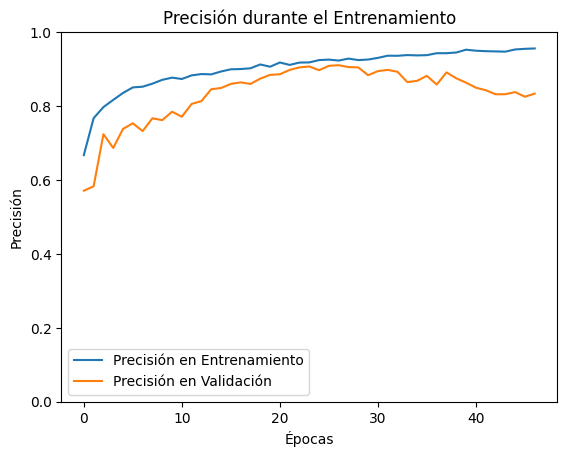

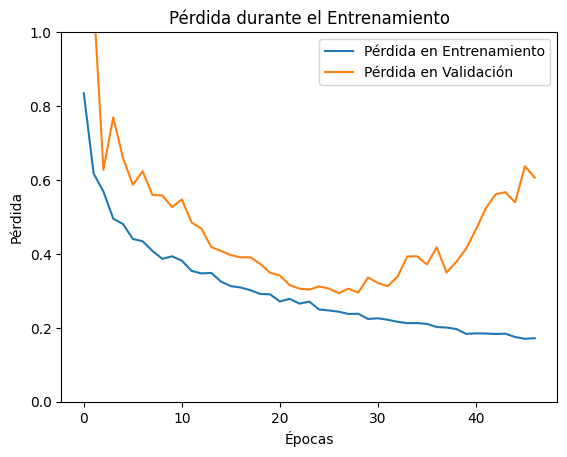

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9643


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5), kernel_regularizer=l2(0.0001))
])

model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4),
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
batch_size = 512
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

Conclusión: No se observan cambios significativos y se reduce ligeramente el AUC.

## Red Neuronal Convolucional 6.
Se intenta mejorar aún más la precisión del modelo.

Medida: Se consideran los contornos de las imágenes a través de 'padding'.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6481 - loss: 0.7626 - val_accuracy: 0.7441 - val_loss: 0.5762
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 469ms/step - accuracy: 0.7884 - loss: 0.5148 - val_accuracy: 0.6892 - val_loss: 0.6380
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 501ms/step - accuracy: 0.8171 - loss: 0.4488 - val_accuracy: 0.7145 - val_loss: 0.6034
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - accuracy: 0.8486 - loss: 0.3924 - val_accuracy: 0.7171 - val_loss: 0.6108
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 514ms/step - accuracy: 0.8489 - loss: 0.3848 - val_accuracy: 0.7728 - val_loss: 0.4955
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 485ms/step - accuracy: 0.8646 - loss: 0.3602 - val_accuracy: 0.7610 - val_loss: 0.5177
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step - accuracy: 0.8701 - loss: 0.3351 - val_accuracy: 0.7500 - val_loss: 0.5177
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step - accuracy: 0.8751 - loss: 0.3160 - val_ac

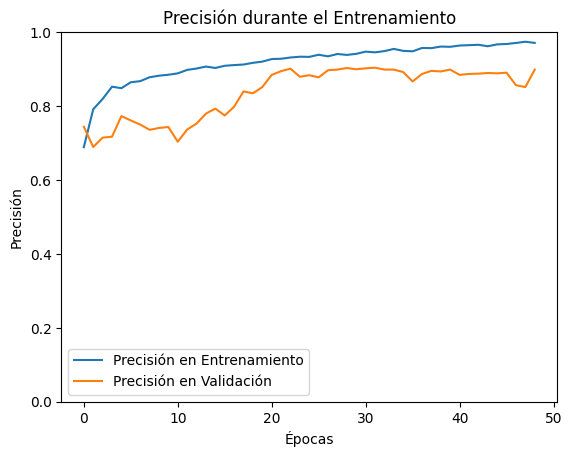

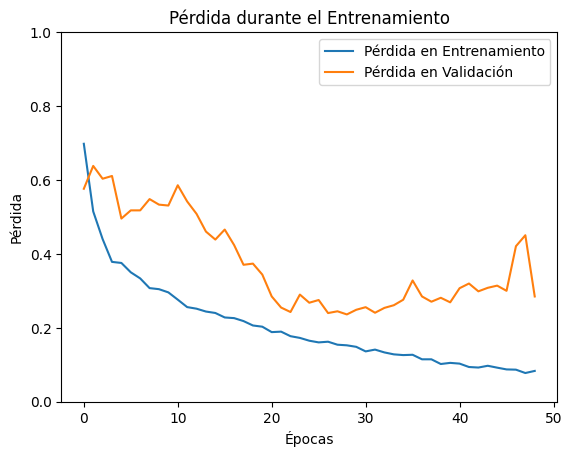

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9652


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])


model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4),
             metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
batch_size = 512
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

Conclusión: No mejora el modelo y disminuye el AUC.

## 6. Comparación de Modelos

A continuación, presentaremos los resultados de los 3 modelos aplicados en el laboratorio:



*   MPL
*   CNN
*   CNN 2






### Métricas por modelo

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Resultados para MLP:
Matriz de Confusión:
[[423 217]
 [120 424]]


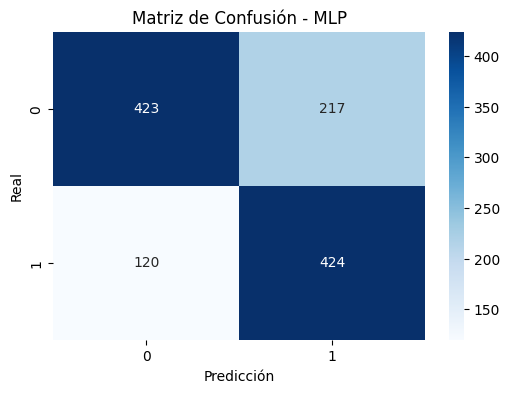

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.78      0.66      0.72       640
         1.0       0.66      0.78      0.72       544

    accuracy                           0.72      1184
   macro avg       0.72      0.72      0.72      1184
weighted avg       0.73      0.72      0.72      1184

Resultados para CNN:
Matriz de Confusión:
[[616  24]
 [ 54 490]]


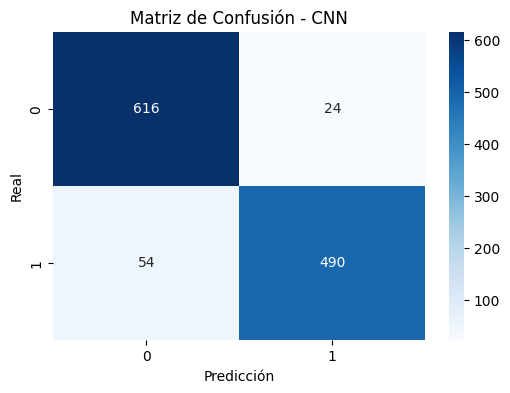

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       640
         1.0       0.95      0.90      0.93       544

    accuracy                           0.93      1184
   macro avg       0.94      0.93      0.93      1184
weighted avg       0.93      0.93      0.93      1184

Resultados para CNN2:
Matriz de Confusión:
[[586  54]
 [ 56 488]]


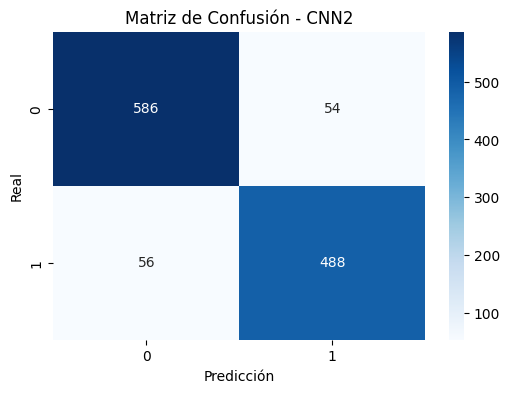

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91       640
         1.0       0.90      0.90      0.90       544

    accuracy                           0.91      1184
   macro avg       0.91      0.91      0.91      1184
weighted avg       0.91      0.91      0.91      1184



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones para cada modelo
y_pred_mlp = (model_mlp.predict(X_test_flattened) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
y_pred_cnn2 = (model_cnn2.predict(X_test) > 0.5).astype("int32")


# Función para mostrar la matriz de confusión y el informe de clasificación
def show_results(model_name, y_true, y_pred):
    print(f"Resultados para {model_name}:")
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de Confusión:")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

    cr = classification_report(y_true, y_pred)
    print("Informe de Clasificación:")
    print(cr)


# Mostrar resultados para cada modelo
show_results("MLP", y_test, y_pred_mlp)
show_results("CNN", y_test, y_pred_cnn)
show_results("CNN2", y_test, y_pred_cnn2)

### Imágenes clasificadas erróneamente

In [ ]:
def plot_images_in_grid(images, titles, n_examples=10, n_rows=2, figsize=(15, 5)):
    """
    Generaliza la creación de una grilla para mostrar imágenes.

    Parameters:
    - images: Lista de imágenes a mostrar.
    - titles: Lista de títulos para cada imagen.
    - n_examples: Número máximo de ejemplos a mostrar.
    - n_rows: Número de filas en la grilla.
    - figsize: Tamaño de la figura (tupla).
    """
    n_cols = (n_examples + n_rows - 1) // n_rows  # Calcula el número de columnas
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Asegura que 'ax' sea una matriz bidimensional
    ax = ax.flatten() if n_rows > 1 else [ax]

    for idx in range(len(ax)):
        if idx < n_examples and idx < len(images):
            ax[idx].imshow(images[idx])
            ax[idx].set_title(titles[idx])
            ax[idx].axis('off')
        else:
            ax[idx].axis('off')  # Desactiva las subtramas no usadas

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

Ejemplos de clasificaciones erróneas en el mejor modelo (segundo modelo convolucional)

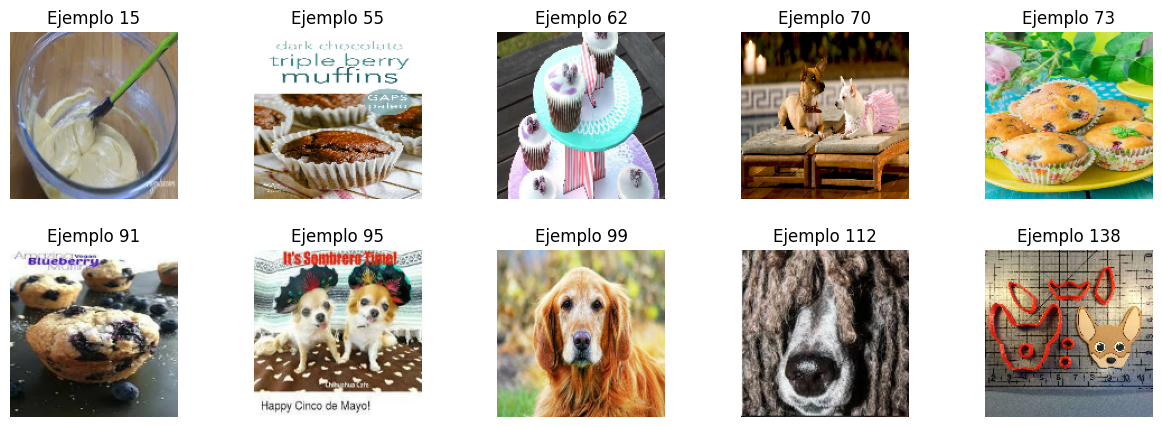

In [ ]:
n_examples = 10
n_rows = 2

# Filtrar las imágenes y títulos a mostrar
filtered_images = [X_test[i] / 255 for i in range(len(y_test)) if y_pred_cnn2[i] != y_test[i]]
filtered_titles = [f'Ejemplo {i}' for i in range(len(y_test)) if y_pred_cnn2[i] != y_test[i]]

# Limitar al número de ejemplos deseados
filtered_images = filtered_images[:n_examples]
filtered_titles = filtered_titles[:n_examples]

# Llamar a la función para graficar
plot_images_in_grid(filtered_images, filtered_titles, n_examples=n_examples, n_rows=n_rows)


Se puede ver la gran dificultad para la clasificación en las imágenes mostrados para el modelo con mejor desempeño. Ejemplos como el 55, 73 y 91 son muffins agrupados juntos que se ven muy similares a chihuahuas agrupados como en el ejemplo 95.

Ejemplos de clasificaciones erróneas en el primer modelo convolucional pero correctas en el segundo

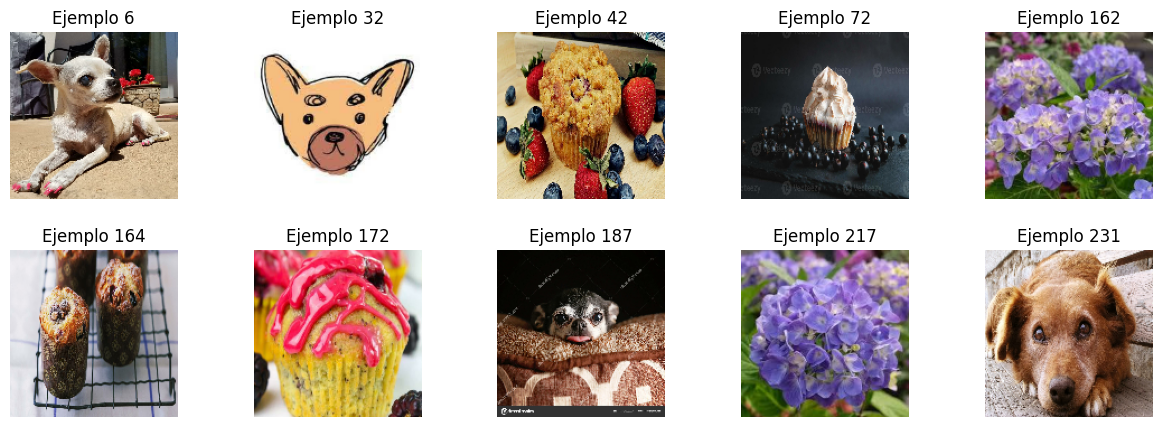

In [ ]:
# Ejemplo de uso con datos de prueba:
n_examples = 10
n_rows = 2

# Filtrar las imágenes y títulos a mostrar
filtered_images = [X_test[i] / 255 for i in range(len(y_test)) \
                   if y_pred_cnn2[i] == y_test[i] and y_pred_cnn[i] != y_test[i]]
filtered_titles = [f'Ejemplo {i}' for i in range(len(y_test)) \
                   if y_pred_cnn2[i] == y_test[i] and y_pred_cnn[i] != y_test[i]]

# Limitar al número de ejemplos deseados
filtered_images = filtered_images[:n_examples]
filtered_titles = filtered_titles[:n_examples]

# Llamar a la función para graficar
plot_images_in_grid(filtered_images, filtered_titles, n_examples=n_examples, n_rows=n_rows)

En este caso se puede ver que el segundo modelo convolucional tiende a captar de mejor manera las diferentes poses de los chihuahuas como en el ejemplo 6 y 187, donde el primer modelo falla en clasificar. Casos como el 32 el segundo modelo convolucional es capaz de clasificarlo correctamente pese a ser animado.

## 7. Conclusiones